# Sparing og lån

Sparing og lån fører til beregninger som hver og en er ganske enkle, men som blir kjedelige å gjennomføre manuelt om man skal følge en konto over tid. Det er en repetetiv øvelse, og alle forsøk på å være matematisk lur går i knas så fort Norges Bank har rentemøte. 

La oss begynne med en vanlig skoleoppgave:
Magda har 100 000 kroner på sparekontoen, som hun har tjent på sommerjobber de siste årene. Hun planlegger å spare disse pengene i banken for å få råd til leielighet en dag. For å få råd til leielighet trenger hun 300 000 kroner i egenkapital. Med en rente på 3 %, virker dette som en god plan?

Denne oppgaven bør gå greit. Vi setter opp likningen for forrenting

$$
f(n) = f_0 \cdot 1.03^n
$$

Så kan vi ta fram kalkulatoren og prøve oss fram. Eller kanskje enda bedre, bruke solve i geogebra. 
`Intersect(f, y=3)`, og få svaret til å bli omtrent 37 år. 

Men hva er da egentlig rente? Vel, det er jo bare en regel som sier at etter så og så lang tid, så ganges pengene du har med et eller annet tall. Altså:

$$
x_{n+1} = r x_n
$$

Og vi vet at om $r$ er en konstant, så kommer løsningen av denne likningen til å være 

$$
x_n = C r^n
$$

Og hvis vi skal kunne spørre for hvilken $n$ får vi en bestemt sum, så må vi på videregående for å lære logaritmer. 

Eller, vi kan lage oss en løkke:

In [5]:
x = 100000
rente = 3*0.01
tid = 0
while x < 300000:
    x = x * (1+rente)
    tid += 1  
    
print("Det er nok penger etter", tid, "år.")
print("Da er det", round(x, 2), "kroner på konto")

Det er nok penger etter 38 år.
Da er det 307478.35 kroner på konto


Så vel så bra, men det er en dårlig plan for Magda. Problemet er at hun ikke har nok penger, og hun trenger nok derfor å spare mer. Men hvordan regner vi på det? 

Dette er for eksempel noe bankene må gjøre hele tiden. De ganger saldoen vår med et tall fra tid til annen, men i tilleg så legger de på saldoen dersom vi setter inn penger. 

Magda er 18 år gammel og sparer til bolig. Hun har 100 000 kroner på konto fra tidligere sommerjobber, og sparer nå 15000 kroner per år. Hun trenger å spare 300 000 kroner for å ha nok egenkapital til en leilighet som koster 2 millioner kroner. Vi kan legge til grunn en rente på 3 %. Er dette en god plan?

Vi har altså å gjøre med en ny likning

$$
x_{n+1} = 1.03 \cdot x_n + 15000
$$

Vi kan også her trylle fram en løsning om vi har vært på universitetet og regnet litt:

$$
x_n = 600000\cdot 1.03^n - 500000
$$

Men dette kan vi ikke gjøre på ungdomsskolen, og jeg måtte åpne opp boka til Tom Lindstrøm fra mattekurset her på blindern for å løse den likningen. Vi kan jo mye heller bare programmere det.

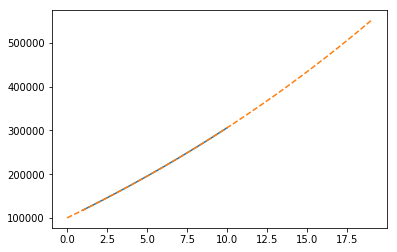

In [27]:
from pylab import *

x = 100000
rente = 0.03
sparing = 15000
tid = 0

saldoer = []
tider = []

while x < 300000:
    x = x * (1+rente) + sparing
    tid += 1
    saldoer.append(x)
    tider.append(tid)
    
plot(tider, saldoer)

# For ordens skyld kan vi også plotte den analytiske løsningen fra hatten
n = array(range(0, 20))
y = 600000*1.03**n - 500000
plot(n, y, "--")
show()

Det er overraskende at noe så enkelt som fast sparing med fast rente kan føre oss til universitetsmatematikken. Men slik er det altså. Heldigvis kan programmering ta dette til ungdomsskolen. Og ikke nok med det. Når vi først er der at vi skjønner hvordan dette kan programmeres, så kan vi begynne å la renta variere. La oss for eksempel bruke reserverenta i norges bank de siste årene til å simulere hvordan det ville vært å spare der de siste årene. 

## Reelle historiske rentedata

Vi kan hente data fra SSB for å studere dette. Det innebærer noen besvergelser, men man kan eksportere dataene som 

Vi kunne også sett på hvor mye det ville lønnet seg å investere i forskjellige typer finansielle instrumenter de siste årene. Da kan det være lurt å hente datasett utenfra. Det er vanligvis et sett med besvergelser som må på plass for at man skal få ut slike data. Men så kan de behandles som ethvert annet datasett. 

FREQ             FREQ                                                Frequency
                 A                                                      Annual
                 B                                                    Business
                 M                                                     Monthly
INSTRUMENT_TYPE  INSTRUMENT_TYPE                               Instrument Type
                 GBON                                         Government bonds
                 KPRA                                          Key policy rate
                 NOWA                                                     NOWA
                 TBIL                                           Treasury bills
TENOR            TENOR                                                   Tenor
                 10Y                                                  10 years
                 12M                                                 12 months
                 3M                                 

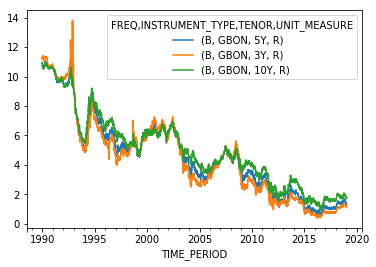

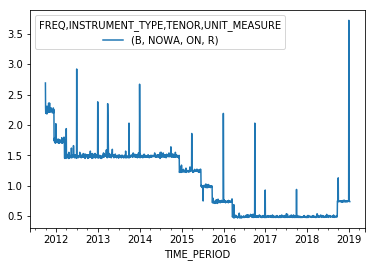

In [125]:
import pandasdmx
from pandasdmx import Request

nbank = Request('NB')

#print(nbank)

response = nbank.dataflow('IR')
response.dataflow.IR.structure(request=True, target_only=False)
print(response.write().codelist['name'])


response = nbank.data('IR', key={"FREQ": "B", 
                             "INSTRUMENT_TYPE": "GBON", 
                             "TENOR": "3Y+5Y+10Y",}, 
                      params={"startPeriod": "1990"})

data = response.write(s for s in response.data.series)
data.plot()

response = nbank.data('IR', key={"FREQ": "B", 
                             "INSTRUMENT_TYPE": "NOWA", 
                             "TENOR": "ON",
                            "UNIT_MEASURE":"R"}, 
                      params={"startPeriod": "1990"})

data = response.write(s for s in response.data.series)
data.plot()


In [116]:
from pylab import *
